# Checking_GPU_Availabilty

In [1]:
import torch
torch.cuda.is_available()
torch.cuda.current_device()
torch.cuda.get_device_name(0)

'NVIDIA GeForce GTX 1650'

In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

In [2]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


## CMD Tensorboard

### tensorboard --logdir="C:\Users\User\OneDrive - University College London\UCL Education\Year 4\MLS\Coursework\AMLS_assignment24_25\Task A\runs\DisplayImage"

# Library imports, data loading and visualisation


In [1]:
import os
import torch
from torch import nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torchvision
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

import medmnist
from medmnist import BreastMNIST
import matplotlib.pyplot as plt
from torch.utils.tensorboard import SummaryWriter  # to print to tensorboard
import os
import shutil

import os
from tensorboard import program

import torch.nn.functional as F  # Parameterless functions, like (some) activation functions
from torch import optim  # For optimizers like SGD, Adam, etc.
from tqdm import tqdm  # For nice progress bar!

## Loading datatsets from BreastMNIST

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Mean and standard deviation for grayscale images
])

In [3]:
batch_size=20
#loading train,val,test into variables
train_data=medmnist.BreastMNIST(split="train",transform=transforms.ToTensor())
val_data=medmnist.BreastMNIST(split="val",transform=transforms.ToTensor())
test_data=medmnist.BreastMNIST(split="test",transform=transforms.ToTensor())

train_loader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(dataset=val_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=batch_size, shuffle=True)


## Debugging and testing

In [4]:

# print(train_data)
# print("=====================")
# print(val_data)
# print("=====================")
# print(test_data)

for i, (images, labels) in enumerate(train_loader):
    print(images.shape)

torch.Size([20, 1, 28, 28])
torch.Size([20, 1, 28, 28])
torch.Size([20, 1, 28, 28])
torch.Size([20, 1, 28, 28])
torch.Size([20, 1, 28, 28])
torch.Size([20, 1, 28, 28])
torch.Size([20, 1, 28, 28])
torch.Size([20, 1, 28, 28])
torch.Size([20, 1, 28, 28])
torch.Size([20, 1, 28, 28])
torch.Size([20, 1, 28, 28])
torch.Size([20, 1, 28, 28])
torch.Size([20, 1, 28, 28])
torch.Size([20, 1, 28, 28])
torch.Size([20, 1, 28, 28])
torch.Size([20, 1, 28, 28])
torch.Size([20, 1, 28, 28])
torch.Size([20, 1, 28, 28])
torch.Size([20, 1, 28, 28])
torch.Size([20, 1, 28, 28])
torch.Size([20, 1, 28, 28])
torch.Size([20, 1, 28, 28])
torch.Size([20, 1, 28, 28])
torch.Size([20, 1, 28, 28])
torch.Size([20, 1, 28, 28])
torch.Size([20, 1, 28, 28])
torch.Size([20, 1, 28, 28])
torch.Size([6, 1, 28, 28])


In [5]:
#visualising the size of the image and its labels
for image , label in train_data:
    print(image.shape)
    print(label)

torch.Size([1, 28, 28])
[1]
torch.Size([1, 28, 28])
[1]
torch.Size([1, 28, 28])
[1]
torch.Size([1, 28, 28])
[1]
torch.Size([1, 28, 28])
[0]
torch.Size([1, 28, 28])
[1]
torch.Size([1, 28, 28])
[1]
torch.Size([1, 28, 28])
[1]
torch.Size([1, 28, 28])
[0]
torch.Size([1, 28, 28])
[1]
torch.Size([1, 28, 28])
[1]
torch.Size([1, 28, 28])
[1]
torch.Size([1, 28, 28])
[0]
torch.Size([1, 28, 28])
[1]
torch.Size([1, 28, 28])
[0]
torch.Size([1, 28, 28])
[1]
torch.Size([1, 28, 28])
[1]
torch.Size([1, 28, 28])
[1]
torch.Size([1, 28, 28])
[1]
torch.Size([1, 28, 28])
[1]
torch.Size([1, 28, 28])
[1]
torch.Size([1, 28, 28])
[1]
torch.Size([1, 28, 28])
[0]
torch.Size([1, 28, 28])
[1]
torch.Size([1, 28, 28])
[1]
torch.Size([1, 28, 28])
[1]
torch.Size([1, 28, 28])
[1]
torch.Size([1, 28, 28])
[0]
torch.Size([1, 28, 28])
[1]
torch.Size([1, 28, 28])
[1]
torch.Size([1, 28, 28])
[0]
torch.Size([1, 28, 28])
[0]
torch.Size([1, 28, 28])
[0]
torch.Size([1, 28, 28])
[1]
torch.Size([1, 28, 28])
[1]
torch.Size([1, 28, 2

### Displaying images on Tensorboard

In [11]:
#location of tensorboard folder
folder="runs/DisplayImage"

In [12]:
clear_folder(folder)
#show using dataset on tensorboard
from torch.utils.tensorboard import SummaryWriter  # to print to tensorboard
writer = SummaryWriter(f"runs/DisplayImage")
for index in range(100):
    data,label=train_data[index]
    writer.add_image("mnist_images", data,index)
    
writer.close()

Failed to delete runs/DisplayImage\Epoch loss_Test: [WinError 5] Access is denied: 'runs/DisplayImage\\Epoch loss_Test'
Failed to delete runs/DisplayImage\Epoch loss_Train: [WinError 5] Access is denied: 'runs/DisplayImage\\Epoch loss_Train'
All contents of the folder 'runs/DisplayImage' have been cleared.


In [13]:
clear_folder(folder)
#show using dataloader with batches
for batch_idx, (data, targets) in enumerate(train_loader):
    # create grid of images
    img_grid = torchvision.utils.make_grid(data)
    # write to tensorboard
    writer.add_image(f"MNIST Example - image batch ", img_grid,batch_idx)
    #print(batch_idx)
writer.close

All contents of the folder 'runs/DisplayImage' have been cleared.


<bound method SummaryWriter.close of <torch.utils.tensorboard.writer.SummaryWriter object at 0x000001D3D1CA1210>>

### Displaying image

torch.Size([28, 28])


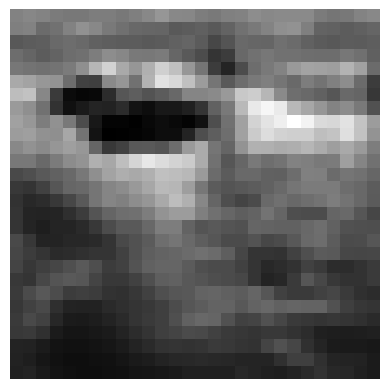

In [ ]:
img,label = train_data[1]
image_np = img.squeeze()
print(image_np.shape)
# Plot the image
plt.imshow(image_np,cmap="gray")
plt.axis('off')  # Hide the axes for better visualization
plt.show()

# Functions

## Check GPU

In [8]:
# Set device cuda for GPU if it's available otherwise run on the CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
torch.cuda.get_device_name(0)

cuda


'NVIDIA GeForce GTX 1650'

In [ ]:
#function to clear tensorboard files

def clear_folder(folder_path):
    # Check if the folder exists
    if not os.path.exists(folder_path):
        print(f"The folder '{folder_path}' does not exist.")
        return
    
    # Iterate through all items in the folder
    for item in os.listdir(folder_path):
        item_path = os.path.join(folder_path, item)
        try:
            # Remove directories
            if os.path.isdir(item_path):
                shutil.rmtree(item_path)
            # Remove files
            else:
                os.remove(item_path)
            print(f"Deleted: {item_path}")
        except Exception as e:
            print(f"Failed to delete {item_path}: {e}")
    
    print(f"All contents of the folder '{folder_path}' have been cleared.")
    #location of tensorboard folder
folder="runs/DisplayImage"


class NN(nn.Module):
    def __init__(self, input_size, num_classes):
        """
        Here we define the layers of the network. We create two fully connected layers

        Parameters:
            input_size: the size of the input, in this case 784 (28x28)
            num_classes: the number of classes we want to predict, in this case 2 (0-1)

        """
        super(NN, self).__init__()
        # # Our first linear layer take input_size, in this case 784 nodes to 50
        # # and our second linear layer takes 50 to the num_classes we have, in
        # # this case 10.
        # self.fc1 = nn.Linear(input_size, 50)
        # self.fc2 = nn.Linear(50, num_classes)

        self.flatten = nn.Flatten() #flattens the input tensors
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 2)
        )

    def forward(self, x):
        """
        x here is the mnist images and we run it through the network that we created above.
        Parameters:
            x: mnist images
        Returns:
            out: the output of the network
        """
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits


class CNN(nn.Module):
    def __init__(self, in_channels=1, num_classes=2):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(
            in_channels=in_channels,
            out_channels=8,
            kernel_size=3,
            stride=1,
            padding=1,
        )
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(
            in_channels=8,
            out_channels=16,
            kernel_size=3,
            stride=1,
            padding=1,
        )
        self.fc1 = nn.Linear(16 * 7 * 7, num_classes)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = x.reshape(x.shape[0], -1)
        x = self.fc1(x)
        return x


def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    accuracies=[]
    batch_loss=0
    for batch, (input_data, class_cat) in enumerate(tqdm(dataloader)):
        input_data, class_cat = input_data.to(device), class_cat.to(device)

        ## Compute prediction error
        pred = model(input_data)
        class_cat=class_cat.squeeze().long()
        loss = loss_fn(pred, class_cat)

        ## Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


        ## calculation running loss
        loss, current = loss.item(), (batch + 1) * len(input_data)


        ##caculating running accuracy
        _, predictions = pred.max(1)
        num_correct = (predictions == class_cat).sum()
        running_train_acc = float(num_correct) / float(input_data.shape[0])
        # print("model Output>>>>>")
        # print(pred)
        # print("predictions>>>")
        # print(predictions)
        # print("num_correct>>>>>")
        # print(num_correct)
        # print("accuracy>>>>")
        # print(running_train_acc)
        # print(data.shape[0])
        # print(input_data.shape[0])
        accuracies.append(running_train_acc)

        ##Plot stuff to tensorboard tensorboard
        global step
        writer.add_scalar("Batch/Training loss",loss,global_step=step)
        writer.add_scalar("Batch/Training Accuracy", running_train_acc, global_step=step)
        # global batch_loss
        # batch_loss.append(loss)
        batch_loss+=loss

        
        step += 1


        #print(f"loss: {loss:>7f} accuracy: {running_train_acc:>5f}  [{current:>5d}/{size:>5d}]")
    
    ## Calculate epoch accuracy
    epoch_accuracy=sum(accuracies)/len(accuracies)

    ## Getting the average epoch loss
    epoch_loss=batch_loss/size
    
    ## Send it to tensorboard
    writer.add_scalars("Epoch/Epoch loss",{'Train':epoch_loss},global_step=epoch)
    writer.add_scalars("Epoch/Epoch Accuracy",{"Train":epoch_accuracy},global_step=epoch)
    

def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            y=y.squeeze().long()
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    writer.add_scalars("Epoch/Epoch loss",{'Test':test_loss},global_step=epoch)
    writer.add_scalars("Epoch/Epoch Accuracy",{"Test":correct},global_step=epoch)
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")


# Fully connected network


In [26]:
# Hyperparameters
input_size = 28*28
num_classes = 2
learning_rate = 0.001
batch_size = 64
num_epochs = 30

model = NN(input_size=input_size, num_classes=num_classes).to(device)
print(model)
## Setting up training and test function
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

##clear tensorboard folder
clear_folder(folder)
writer = SummaryWriter(f"runs/DisplayImage")

# Visualize model in TensorBoard
example_img, labels = next(iter(train_loader))
#example_img=example_img[0]
writer.add_graph(model,example_img.to(device))
print("Model sent to tensorboard")

step=0
# epoch_loss=[]
for t in range(num_epochs):
    epoch=t
    # batch_loss=[]
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_loader, model, loss_fn, optimizer)
    
    # epoch_loss.append(sum(batch_loss)/len(batch_loss))
    # writer.add_scalar("Epoch Training loss",epoch_loss[t],global_step=t)
    test(test_loader, model, loss_fn)

print("Done!")

NN(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=2, bias=True)
  )
)
Failed to delete runs/DisplayImage\Epoch_Epoch Accuracy_Test: [WinError 5] Access is denied: 'runs/DisplayImage\\Epoch_Epoch Accuracy_Test'
Failed to delete runs/DisplayImage\Epoch_Epoch Accuracy_Train: [WinError 5] Access is denied: 'runs/DisplayImage\\Epoch_Epoch Accuracy_Train'
Failed to delete runs/DisplayImage\Epoch_Epoch loss_Test: [WinError 5] Access is denied: 'runs/DisplayImage\\Epoch_Epoch loss_Test'
Failed to delete runs/DisplayImage\Epoch_Epoch loss_Train: [WinError 5] Access is denied: 'runs/DisplayImage\\Epoch_Epoch loss_Train'
Deleted: runs/DisplayImage\events.out.tfevents.1733782303.DESKTOP-3FC1MTH.40840.33
All contents of the folder 'runs/DisplayImage' have been clear

100%|██████████| 28/28 [00:00<00:00, 78.00it/s]


Test Error: 
 Accuracy: 73.1%, Avg loss: 0.541412 

Epoch 2
-------------------------------


100%|██████████| 28/28 [00:00<00:00, 217.56it/s]


Test Error: 
 Accuracy: 74.4%, Avg loss: 0.520576 

Epoch 3
-------------------------------


100%|██████████| 28/28 [00:00<00:00, 210.44it/s]


Test Error: 
 Accuracy: 79.5%, Avg loss: 0.500652 

Epoch 4
-------------------------------


100%|██████████| 28/28 [00:00<00:00, 202.86it/s]


Test Error: 
 Accuracy: 79.5%, Avg loss: 0.493199 

Epoch 5
-------------------------------


100%|██████████| 28/28 [00:00<00:00, 197.83it/s]


Test Error: 
 Accuracy: 77.6%, Avg loss: 0.480497 

Epoch 6
-------------------------------


100%|██████████| 28/28 [00:00<00:00, 206.73it/s]


Test Error: 
 Accuracy: 80.8%, Avg loss: 0.463956 

Epoch 7
-------------------------------


100%|██████████| 28/28 [00:00<00:00, 204.56it/s]


Test Error: 
 Accuracy: 79.5%, Avg loss: 0.481705 

Epoch 8
-------------------------------


100%|██████████| 28/28 [00:00<00:00, 186.94it/s]


Test Error: 
 Accuracy: 78.2%, Avg loss: 0.482178 

Epoch 9
-------------------------------


100%|██████████| 28/28 [00:00<00:00, 204.03it/s]


Test Error: 
 Accuracy: 74.4%, Avg loss: 0.519851 

Epoch 10
-------------------------------


100%|██████████| 28/28 [00:00<00:00, 202.45it/s]


Test Error: 
 Accuracy: 79.5%, Avg loss: 0.458002 

Epoch 11
-------------------------------


100%|██████████| 28/28 [00:00<00:00, 202.13it/s]


Test Error: 
 Accuracy: 78.8%, Avg loss: 0.504637 

Epoch 12
-------------------------------


100%|██████████| 28/28 [00:00<00:00, 181.47it/s]


Test Error: 
 Accuracy: 75.0%, Avg loss: 0.499019 

Epoch 13
-------------------------------


100%|██████████| 28/28 [00:00<00:00, 198.62it/s]


Test Error: 
 Accuracy: 78.8%, Avg loss: 0.542967 

Epoch 14
-------------------------------


100%|██████████| 28/28 [00:00<00:00, 196.66it/s]


Test Error: 
 Accuracy: 80.1%, Avg loss: 0.459975 

Epoch 15
-------------------------------


100%|██████████| 28/28 [00:00<00:00, 197.93it/s]


Test Error: 
 Accuracy: 78.2%, Avg loss: 0.464323 

Epoch 16
-------------------------------


100%|██████████| 28/28 [00:00<00:00, 184.93it/s]


Test Error: 
 Accuracy: 80.8%, Avg loss: 0.502367 

Epoch 17
-------------------------------


100%|██████████| 28/28 [00:00<00:00, 194.65it/s]


Test Error: 
 Accuracy: 80.1%, Avg loss: 0.467741 

Epoch 18
-------------------------------


100%|██████████| 28/28 [00:00<00:00, 193.16it/s]


Test Error: 
 Accuracy: 80.8%, Avg loss: 0.470335 

Epoch 19
-------------------------------


100%|██████████| 28/28 [00:00<00:00, 192.50it/s]


Test Error: 
 Accuracy: 80.1%, Avg loss: 0.463260 

Epoch 20
-------------------------------


100%|██████████| 28/28 [00:00<00:00, 181.08it/s]


Test Error: 
 Accuracy: 77.6%, Avg loss: 0.527370 

Epoch 21
-------------------------------


100%|██████████| 28/28 [00:00<00:00, 186.82it/s]


Test Error: 
 Accuracy: 75.6%, Avg loss: 0.546032 

Epoch 22
-------------------------------


100%|██████████| 28/28 [00:00<00:00, 193.74it/s]


Test Error: 
 Accuracy: 82.1%, Avg loss: 0.456847 

Epoch 23
-------------------------------


100%|██████████| 28/28 [00:00<00:00, 186.71it/s]


Test Error: 
 Accuracy: 80.1%, Avg loss: 0.546454 

Epoch 24
-------------------------------


100%|██████████| 28/28 [00:00<00:00, 176.75it/s]


Test Error: 
 Accuracy: 80.8%, Avg loss: 0.466168 

Epoch 25
-------------------------------


100%|██████████| 28/28 [00:00<00:00, 187.30it/s]


Test Error: 
 Accuracy: 78.8%, Avg loss: 0.495236 

Epoch 26
-------------------------------


100%|██████████| 28/28 [00:00<00:00, 179.47it/s]


Test Error: 
 Accuracy: 78.2%, Avg loss: 0.490899 

Epoch 27
-------------------------------


100%|██████████| 28/28 [00:00<00:00, 178.47it/s]


Test Error: 
 Accuracy: 79.5%, Avg loss: 0.470120 

Epoch 28
-------------------------------


100%|██████████| 28/28 [00:00<00:00, 180.13it/s]


Test Error: 
 Accuracy: 73.1%, Avg loss: 0.633899 

Epoch 29
-------------------------------


100%|██████████| 28/28 [00:00<00:00, 185.06it/s]


Test Error: 
 Accuracy: 79.5%, Avg loss: 0.515760 

Epoch 30
-------------------------------


100%|██████████| 28/28 [00:00<00:00, 183.66it/s]


Test Error: 
 Accuracy: 79.5%, Avg loss: 0.504015 

Done!


# CNN

In [ ]:
# Full implementation

# Hyperparameters
input_size = 28*28
num_classes = 2
learning_rate = 0.001
batch_size = 64
num_epochs = 1000

model = NN(input_size=input_size, num_classes=num_classes).to(device)
print(model)
## Setting up training and test function
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

##clear tensorboard folder
clear_folder(folder)
writer = SummaryWriter(f"runs/DisplayImage")

# Visualize model in TensorBoard
example_img, labels = next(iter(train_loader))
#example_img=example_img[0]
writer.add_graph(model,example_img.to(device))
print("Model sent to tensorboard")

step=0
# epoch_loss=[]
for t in range(num_epochs):
    epoch=t
    # batch_loss=[]
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_loader, model, loss_fn, optimizer)
    
    # epoch_loss.append(sum(batch_loss)/len(batch_loss))
    # writer.add_scalar("Epoch Training loss",epoch_loss[t],global_step=t)
    test(test_loader, model, loss_fn)

print("Done!")